In [32]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from graphviz import Source
from IPython.display import SVG
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Explore data set and optionaly remove outliers
df = pd.read_csv('./data/pulsar_stars.csv')
print(df.head())
print(df.shape)
print(df.isnull().sum())

X = df.drop(["target_class"], axis = 1)
y = df.iloc[:,-1]
print(X.head())
print(y.head())
learner_results={}

    Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                        

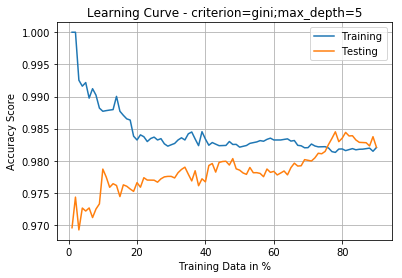

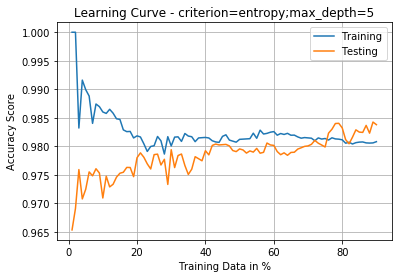

[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']


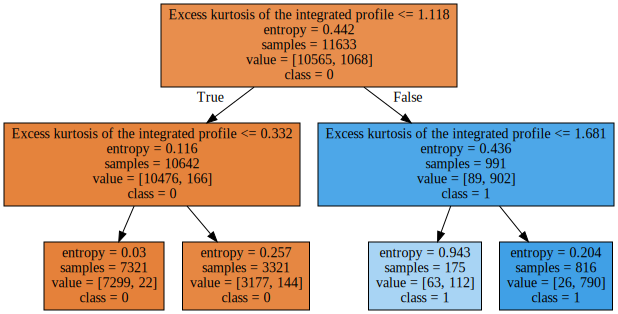

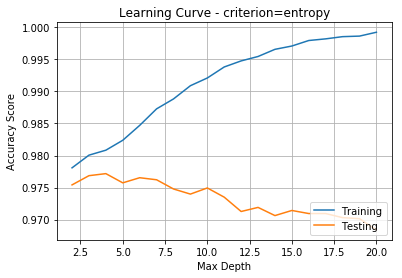

Find best parameters and score:
0.9790251869681079 {'criterion': 'entropy', 'max_depth': 6}


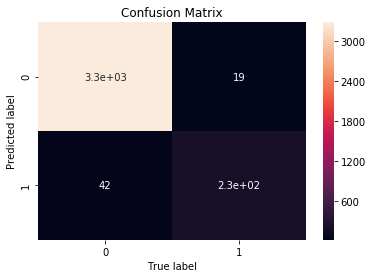

0.9829608938547486


In [30]:
# Decision Tree

# Switch plot backend
plt.switch_backend('Agg')
%matplotlib inline

# Decision Tree Learning
train_list=[]
test_list=[]
for i in range(1,91):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,91),train_list, label='Training')
plt.plot(range(1,91),test_list, label='Testing')
plt.title("Learning Curve - criterion=gini;max_depth=5")
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

train_list=[]
test_list=[]
for i in range(1,91):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,91),train_list, label='Training')
plt.plot(range(1,91),test_list, label='Testing')
plt.title("Learning Curve - criterion=entropy;max_depth=5")
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

# Decision Tree Explore
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.35)
clf = clf.fit(X_train, y_train)
features = list(df.iloc[:,0:-1].columns.values)
print(features)
graph = Source(export_graphviz(clf,out_file=None,feature_names=features,class_names=['0', '1'],filled=True))
display(SVG(graph.pipe(format='svg')))

# Decision Tree with different tree depth
train_list=[]
test_list=[]
for i in range(2,21):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.35)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(2,21),train_list, label='Training')
plt.plot(range(2,21),test_list, label='Testing')
plt.title("Learning Curve - criterion=entropy")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

# Decision Tree Cross Validation
parameters = {'max_depth':range(2,21), 'criterion':['entropy','gini']}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.35)
clf.fit(X=X_train, y=y_train)
print("Find best parameters and score:")
print(clf.best_score_, clf.best_params_)

# Decision Tree Confusion Matrix
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
clf = clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
cm = confusion_matrix(y_test,test_predict)
cm = np.round(cm,1)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()
score = accuracy_score(y_test, test_predict)
learner_results["Decision Tree"] = score
print(score)

In [14]:
# Neural Network

# Neural Network Cross Validation to find best parameters
clf = MLPClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
parameters = {'activation':['relu','logistic'],'hidden_layer_sizes':[(25,),(50,),(100,)],'learning_rate_init':[0.01,0.1]}
clf = GridSearchCV(MLPClassifier(), parameters, cv=3)
clf.fit(X=X_train, y=y_train)
print("Find best parameters and score:")
print(clf.best_score_, clf.best_params_)
learner_results["Neural Network"] = clf.best_score_

Find best parameters and score:
0.9756250873026959 {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}


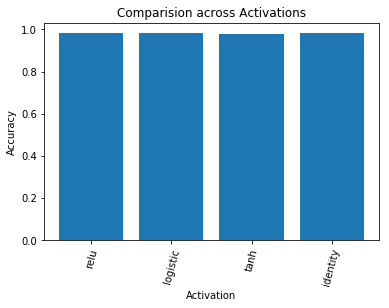

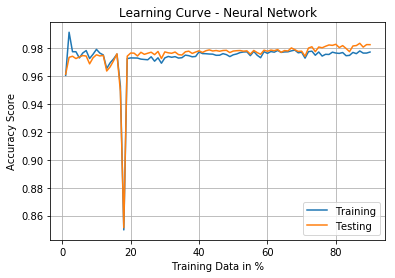

<Figure size 432x288 with 0 Axes>

In [16]:
test_list={}
for i in ['relu','logistic','tanh','identity']:
    clf = MLPClassifier(activation=i, hidden_layer_sizes=(100,), learning_rate_init=0.01)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
    clf = clf.fit(X_train, y_train)
    test_predict = clf.predict(X_test)
    test_list[i] = accuracy_score(y_test, test_predict)

plt.bar(test_list.keys(),test_list.values())
plt.xticks(rotation=75)
plt.ylabel('Accuracy')
plt.xlabel('Activation')
plt.title('Comparision across Activations')
plt.show()
plt.clf()

train_list=[]
test_list=[]
for i in range(1,91):
    clf = MLPClassifier(activation='relu', hidden_layer_sizes=(100,), learning_rate_init=0.01)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,91),train_list, label='Training')
plt.plot(range(1,91),test_list, label='Testing')
plt.title("Learning Curve - Neural Network")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

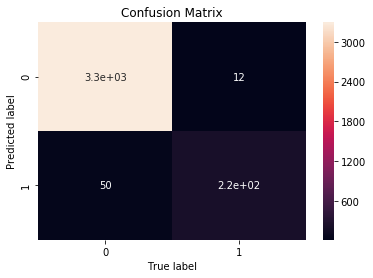

0.9826815642458101


In [18]:
# Neural Network Confusion Matrix
clf = MLPClassifier(activation='relu', hidden_layer_sizes=(100,), learning_rate_init=0.01)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
clf = clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
cm = confusion_matrix(y_test,test_predict)
cm = np.round(cm,1)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()
score = accuracy_score(y_test, test_predict)
if score > learner_results["Neural Network"]:
    learner_results["Neural Network"] = score
print(score)

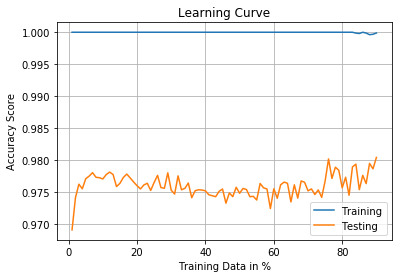

<Figure size 432x288 with 0 Axes>

In [19]:
# Boosting

train_list=[]
test_list=[]
for i in range(1,91):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),n_estimators=50)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,91),train_list, label='Training')
plt.plot(range(1,91),test_list, label='Testing')
plt.title("Learning Curve")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

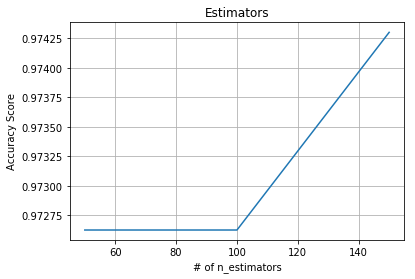

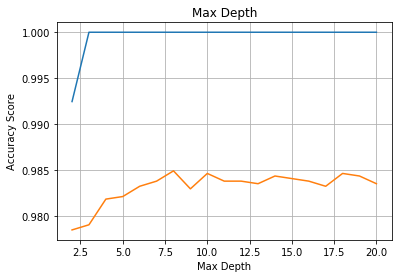

Max depth of tree is:
8


<Figure size 432x288 with 0 Axes>

In [21]:
test_list=[]
for i in [50,100,150]:
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),n_estimators=i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)
    clf = clf.fit(X_train, y_train)
    test_predict = clf.predict(X_test)
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot([50,100,150],test_list, label='Testing')
plt.title("Estimators")
plt.grid()
plt.xlabel('# of n_estimators')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

train_list=[]
test_list=[]
for i in range(2,21):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i),n_estimators=150)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(2,21),train_list, label='Training')
plt.plot(range(2,21),test_list, label='Testing')
plt.title("Max Depth")
plt.grid()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 
print("Max depth of tree is:")
print(test_list.index(max(test_list)) + 2)

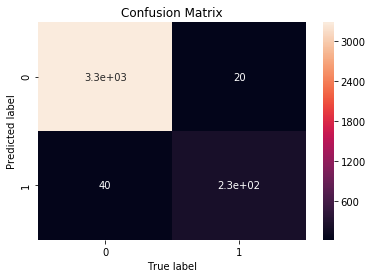

0.9832402234636871


In [22]:
# Boosting Confusion Matrix
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),n_estimators=150)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
clf = clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
cm = confusion_matrix(y_test,test_predict)
cm = np.round(cm,1)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()
score = accuracy_score(y_test, test_predict)
print(score)
learner_results["Boosting"] = score

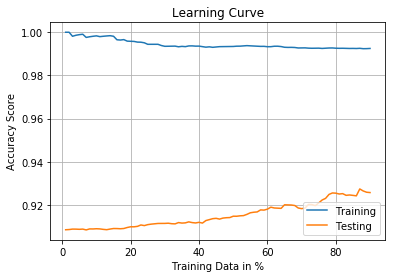

<Figure size 432x288 with 0 Axes>

In [23]:
# SVM
# This takes around 10 mins
train_list=[]
test_list=[]
for i in range(1,91):
    clf = SVC(gamma='auto')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,91),train_list, label='Training')
plt.plot(range(1,91),test_list, label='Testing')
plt.title("Learning Curve")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

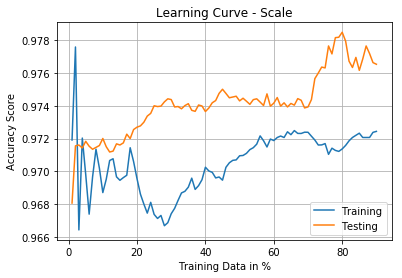

<Figure size 432x288 with 0 Axes>

In [24]:
# This is much faster
train_list=[]
test_list=[]
for i in range(1,91):
    clf = SVC(random_state=40, gamma = "scale")
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,91),train_list, label='Training')
plt.plot(range(1,91),test_list, label='Testing')
plt.title("Learning Curve - Scale")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

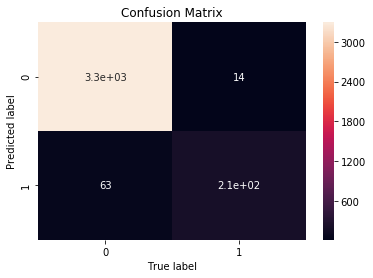

0.9784916201117319


In [25]:
# SVM Confusion Matrix
clf = SVC(gamma = "scale")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
clf = clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
cm = confusion_matrix(y_test,test_predict)
cm = np.round(cm,1)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()
score = accuracy_score(y_test, test_predict)
print(score)
learner_results["SVM"] = score

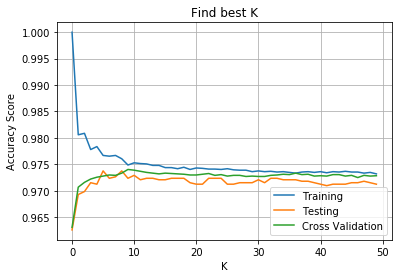

The best K is:
6


<Figure size 432x288 with 0 Axes>

In [26]:
# KNN

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)
test_list=[]
train_list=[]
cross_score=[]
for K in range(1,51):
    clf = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(clf, X_train, y_train, cv=3)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
    cross_score.append(sum(scores)/len(scores))
plt.plot(range(len(train_list)),train_list, label='Training')
plt.plot(range(len(test_list)),test_list, label='Testing')
plt.plot(range(len(cross_score)),cross_score, label='Cross Validation')
plt.title("Find best K")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

print("The best K is:")
print(test_list.index(max(test_list)) + 1)

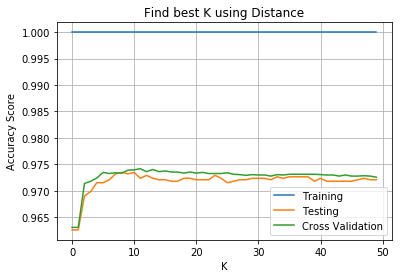

The best K is:
9


<Figure size 432x288 with 0 Axes>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)
test_list=[]
train_list=[]
cross_score=[]
for K in range(1,51):
    clf = KNeighborsClassifier(n_neighbors=K, weights='distance')
    scores = cross_val_score(clf, X_train, y_train, cv=3)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
    cross_score.append(sum(scores)/len(scores))
plt.plot(range(len(train_list)),train_list, label='Training')
plt.plot(range(len(test_list)),test_list, label='Testing')
plt.plot(range(len(cross_score)),cross_score, label='Cross Validation')
plt.title("Find best K using Distance")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

print("The best K is:")
print(test_list.index(max(test_list)) + 1)

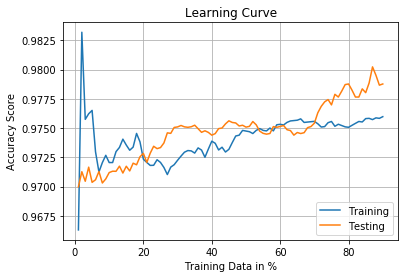

<Figure size 432x288 with 0 Axes>

In [27]:
train_list=[]
test_list=[]
for i in range(1,91):
    clf = KNeighborsClassifier(n_neighbors=6)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,91),train_list, label='Training')
plt.plot(range(1,91),test_list, label='Testing')
plt.title("Learning Curve")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 
learner_results["KNN"] = max(test_list)

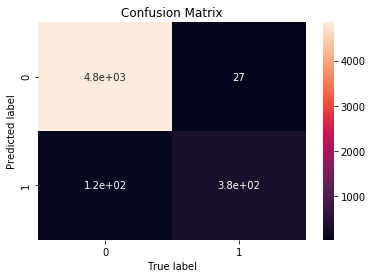

In [28]:
# KNN Confusion Matrix
clf = KNeighborsClassifier(n_neighbors=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)
clf = clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
cm = confusion_matrix(y_test,test_predict)
cm = np.round(cm,1)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

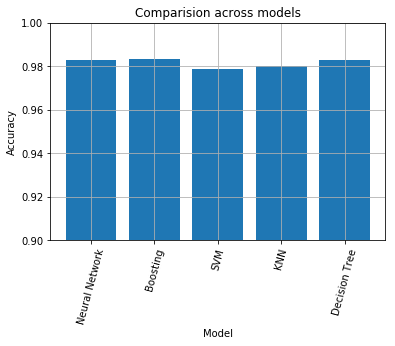

{'Neural Network': 0.9826815642458101, 'Boosting': 0.9832402234636871, 'SVM': 0.9784916201117319, 'KNN': 0.9802320584443489, 'Decision Tree': 0.9829608938547486}


In [31]:
plt.bar(learner_results.keys(),learner_results.values())
plt.xticks(rotation=75)
plt.ylim((0.9,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid()
plt.title('Comparision across models')
plt.show()
print(learner_results)